In [1]:
# Based on data we can observe that the capomulin regimen significantly reduces the tumor volume more than a 30%.
# In most cases the weight of the mouse is a factor in the volume of the tumor. More weight bigger tumor.
# Having almost the same number of male and female mice could give your more confidence in telling if tumor volume depends
# on gender or is a factor that's not important related to cancer.

In [2]:
#Import modules and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
#Data files paths
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

#Read mouse and study data
mouse_df = pd.read_csv(mouse_metadata)
study_df = pd.read_csv(study_results)

In [4]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
#Merging dataframes
merged_data = pd.merge(mouse_df, study_df, on="Mouse ID")
merged_data.head(12)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
#Summary statistics for each regimen
regimens = merged_data["Drug Regimen"].unique()
summary_df = pd.DataFrame({"Drug Regimen":[], "Mean":[], "Median":[], "Variance":[], "Std Deviation":[], "SEM":[]})
row_data={}
for regimen in regimens:
    df = merged_data.loc[merged_data["Drug Regimen"] == regimen]
    row_data["Drug Regimen"] = regimen
    mean = np.mean(df["Tumor Volume (mm3)"])
    row_data["Mean"] = mean
    median = np.median(df["Tumor Volume (mm3)"])
    row_data["Median"] = median
    variance = np.var(df["Tumor Volume (mm3)"], ddof=0)
    row_data["Variance"] = variance
    std_deviation = np.std(df["Tumor Volume (mm3)"], ddof=0)
    row_data["Std Deviation"] = std_deviation
    sem = st.sem(df["Tumor Volume (mm3)"])
    row_data["SEM"] = sem
    summary_df = summary_df.append(row_data, ignore_index=True)
    
summary_df

,Drug Regimen,Mean,Median,Variance,Std Deviation,SEM
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
5,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
6,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
7,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
8,Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


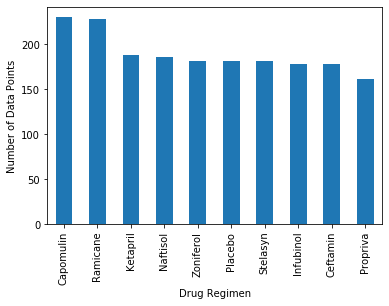

In [8]:
#Pandas plot method
counts = merged_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

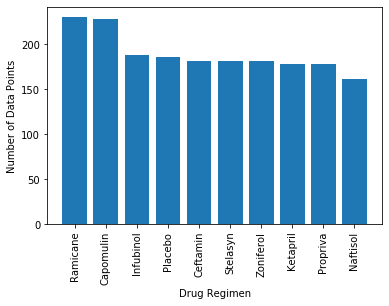

In [9]:
#Matplotlib plot
plt.bar(regimens, counts.tolist())
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

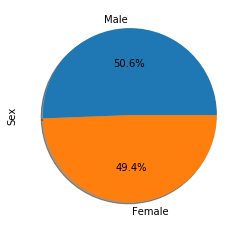

In [10]:
#Getting how many males and females mice
gender_count = merged_data["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%", shadow=True)

Text(0, 0.5, 'Sex')

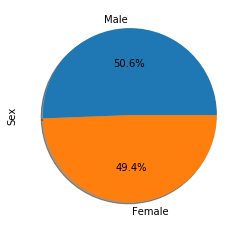

In [11]:
#Matplotlib pie
sizes = gender_count.tolist()
sizes = [958, 935]
plt.pie(sizes, labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")

In [12]:
#Dataframe for best 4 treatments
best_treatments = merged_data.loc[((merged_data["Drug Regimen"] == "Capomulin") | (merged_data["Drug Regimen"] == "Ramicane") |
                                 (merged_data["Drug Regimen"] == "Infubinol") | (merged_data["Drug Regimen"] == "Ceftamin")) &
                                 (merged_data["Timepoint"] == 45)]
capomulin_df = best_treatments.loc[best_treatments["Drug Regimen"] == "Capomulin"]
ramicane_df = best_treatments.loc[best_treatments["Drug Regimen"] == "Ramicane"]
infubinol_df = best_treatments.loc[best_treatments["Drug Regimen"] == "Infubinol"]
ceftamin_df = best_treatments.loc[best_treatments["Drug Regimen"] == "Ceftamin"]

In [13]:
#Each treatment quartiles
quartiles = best_treatments['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 33.48002734
The upper quartile of Tumor Volume is: 62.14221369
The interquartile range of Tumor Volume is: 28.66218635
The the median of Tumor Volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


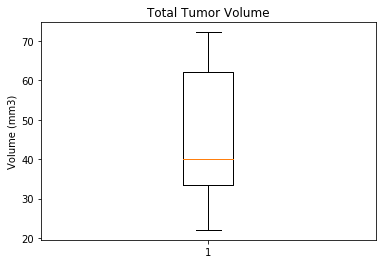

In [14]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Total Tumor Volume')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(best_treatments["Tumor Volume (mm3)"], flierprops=green_diamond)
plt.show()

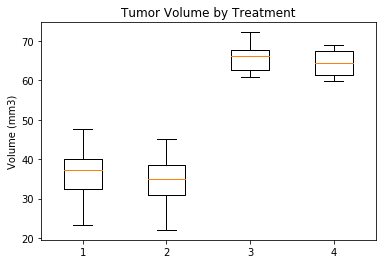

In [15]:
#Box plot for each regimen
data = [capomulin_df["Tumor Volume (mm3)"], ramicane_df["Tumor Volume (mm3)"], 
     infubinol_df["Tumor Volume (mm3)"], ceftamin_df["Tumor Volume (mm3)"]]
fig2, ax2 = plt.subplots()
ax2.set_title('Tumor Volume by Treatment')
ax2.set_ylabel('Volume (mm3)')
ax2.boxplot(data, flierprops=green_diamond)

plt.show()

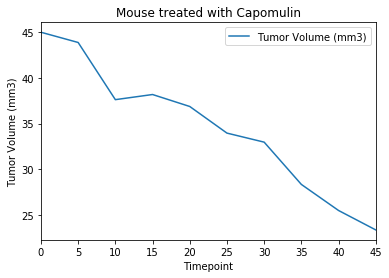

In [16]:
#One mouse line plot
one_mouse_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
mouse_id = one_mouse_df["Mouse ID"].unique()
mouse_id = mouse_id[0]
one_mouse_df = one_mouse_df.loc[one_mouse_df["Mouse ID"] == mouse_id]
one_mouse_df.plot("Timepoint", "Tumor Volume (mm3)")
plt.title("Mouse treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

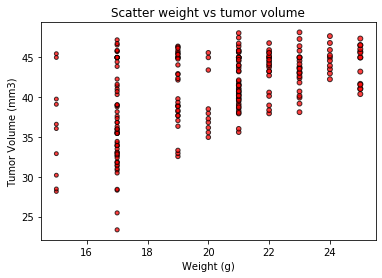

In [17]:
#Scatter plot weight vs tumor volume
capomulin_regimen = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
x_axis = capomulin_regimen["Weight (g)"]
data = capomulin_regimen["Tumor Volume (mm3)"]
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.title("Scatter weight vs tumor volume")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

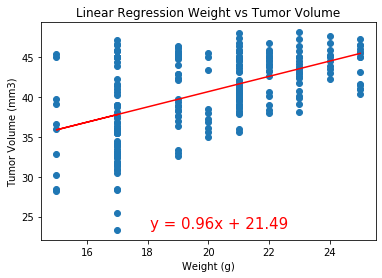

In [18]:
#Calculate the correlation coefficient and linear regression model between 
#mouse weight and average tumor volume for the Capomulin treatment.
x_values = capomulin_regimen["Weight (g)"]
y_values = capomulin_regimen["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(150, 50), xycoords='figure points', fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear Regression Weight vs Tumor Volume")
plt.show()